# Multi-Factor Model Comparison with California Housing Set

What makes a good multi-factor model?  One way is the standarized assessment of a goodness of fit or R squared.  Statistically, the coefficient of multiple determination, ranging from zero to one, . . . below is a demonstration of two different models with a standard dataset for California Housing. 

The closer to one we get for R squared, the better the factors or features explains the price of housing.  We begin with the classical model first and score its goodness of fit, followed by a contemporary model and its score.  Data visualizations of the missed predictions will accompany the scores and we will see how the latter model will improve over the older model.

#### I.    Importing the Dataset and Set Up

#### II.   Classical Multiple Linear Regression

#### III.  Contemporary Support Vector Regression

In [17]:
# Required imports
import numpy as np
import pandas as pd


# Required data science libaries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm

# Data Visualization Libaries 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Remove annoying warnings
import warnings
warnings.filterwarnings("ignore")

# I.    Importing the Dataset and Set Up

In [2]:
from sklearn.datasets.california_housing import fetch_california_housing
cal_housing = fetch_california_housing()

In [3]:
X, y = cal_housing.data, cal_housing.target

names = cal_housing.feature_names

#### A description of the California housing dataset can be found here below and native to the sklearn library.

http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

In [31]:
cal_housing.data.shape

(20640, 8)

#### There are 20,640 observations with 8 features.

In [5]:
print(cal_housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


#### Assign the variables for analysis

In [6]:
df = pd.DataFrame(data=X)

MedInc, HouseAge, AveRooms, AveBedrms = df.loc[:, 0], df.loc[:, 1], df.loc[:, 2], df.loc[:, 3]

Population, AveOccup, Latitude, Longitude = df.loc[:, 4], df.loc[:, 5], df.loc[:, 6], df.loc[:, 7]

#### If we look at the descriptive statistics, then there is good variability across all the features.  

In [7]:
pd.options.display.float_format = '{:,.2f}'.format # Limit output to fewer decimal places
df.describe()

,0,1,2,3,4,5,6,7
count,"20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00"
mean,3.87,28.64,5.43,1.10,"1,425.48",3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,"1,132.46",10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,"1,166.00",2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,"1,725.00",3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,"35,682.00","1,243.33",41.95,-114.31


In [8]:
# create target variable to set up for multi-factor modeling
df['Price'] = cal_housing.target
df.head(3)

,0,1,2,3,4,5,6,7,Price
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23,4.53
1,8.30,21.00,6.24,0.97,"2,401.00",2.11,37.86,-122.22,3.58
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24,3.52


#    II.  Classical Multiple Linear Regression Model

Commonly used in the industry for many years . . .

## Split train-test dataset

#### Split the dataset into two for training and testing with a target value, y, and a set of predictor values, X. 

#### Y = California Housing Price

#### X = All other features

In [9]:
X = df.drop('Price', axis = 1)

Y = df['Price']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

print(X_train.shape)

print(X_test.shape)

print(Y_train.shape)

print(Y_test.shape)

(13828, 8)
(6812, 8)
(13828,)
(6812,)


#### Implement by fitting and scoring the MLR model with our dataset

In [11]:
reg = LinearRegression().fit(X, y)

reg.score(X, y)

0.6062326851998049

#### Above is a goodness of fit measure, the coefficient of determination R^2 of the prediction.  A perfect 1.00 is overfitting so a 0.606 is not bad, but can be improved to a higher value.

In [12]:
data = np.array(X)

In [13]:
reg.predict(data)

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

#### The above predictions are for the features in the dataset, but let's continue to focus on the goodness of fit of the model by looking at at the predictions.

#### Residuals are the difference between the observed value of the dependent variable, y, the observed price of housing and the predicted value y hat.  In a linear regression, residuals have to be small and normally distributed.

Text(0.5, 1.0, 'Residual Plot using training in red and test in orange data')

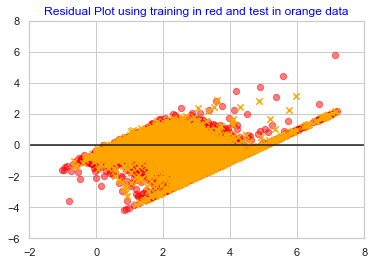

In [18]:
# Grid Set Up
sns.set(style="whitegrid")

# Variables for the plot
g = plt.scatter(reg.predict(X_train), reg.predict(X_train) - Y_train, marker = 'o', c = 'red', s = 40, alpha = 0.5)
h = plt.scatter(reg.predict(X_test), reg.predict(X_test) - Y_test, marker = 'x', c = 'orange', s = 40)

#Scaling the output to fit
plt.xlim(-2, 8) #for x axis
plt.ylim(-6,8) #for y axis
plt.hlines ( y = 0, xmin = -2, xmax = 8)

# Title
plt.title ('Residual Plot using training in red and test in orange data',color='blue')

#### The positive value residuals above the horizontal y-axis has predictions that are too low, while too high predictions are the negative value residuals below the horizontal y-axis.

#### An exact guess would be zero, spot on the horizontal y-axis . . . altogether the clustering is a visual indication of relatively strong score.  If we had a more scattered residual plot, then our coefficient of determination R^2 of the prediction would like be lower than 0.60.

# III. Contemporary Support Vector Regression Model

The original paper of the model is below that began with the Support Vector Machine followed by a regression model as an extension.  Unlike the classical model, outliers are not a issue in datasets as the datapoints are split and optimized.

http://image.diku.dk/imagecanon/material/cortes_vapnik95.pdf

In [19]:
clf = svm.SVR()

In [20]:
svr = clf.fit(X, y) 

In [21]:
clf.score(X,y)

0.7506287852385003

#### We have an improvement of the goodness of fit by about 15 points.

Text(0.5, 1.0, 'Residual Plot using training in red and test in orange data')

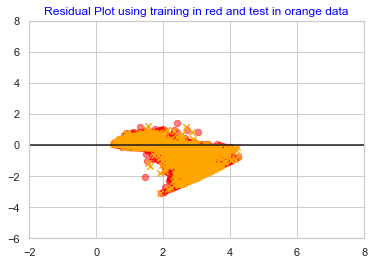

In [22]:
# Grid Set Up
sns.set(style="whitegrid")

# Variables for the plot
plt.scatter(svr.predict(X_train), svr.predict(X_train) - Y_train, marker = 'o', c = 'red', s = 40, alpha = 0.5)
plt.scatter(svr.predict(X_test), svr.predict(X_test) - Y_test, marker = 'x', c = 'orange', s = 40)

#Scaling the output to fit . . . just like Multiple Linear Regresssion
plt.xlim(-2, 8) #for x axis
plt.ylim(-6,8) #for y axis
plt.hlines ( y = 0, xmin = -2, xmax = 8)

# Title
plt.title ('Residual Plot using training in red and test in orange data',color='blue')

#### Residuals are closer together and less sparse than the Multiple Linear Regression residuals . . . on the same identical scale.  

In [30]:
clf.predict(X)

array([2.94811941, 2.91624468, 3.2408894 , ..., 1.02304626, 0.94714491,
       0.99407125])